import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
filename = 'trainable_last_large_beta'
image_title = '$\\|\\beta\\|_2^2$: 16, Trainable: last layer'
plotly_title = r'$\|\beta\|_2^2$: 16, Trainable: last layer'
exp = 'summary/' + filename + '.txt'
with open(exp) as fh:
    out = fh.read()

out = re.split(r'\n', out)

dict_list = []
for d in out:
    try:
        f = eval(d)
        dict_list.append(f)
    except:
        continue

#dict_list = [eval(d) for d in out]
df = pd.DataFrame(dict_list)
#df['lipton-excess'] = (df['lipton'] - df['bayes_error']).astype('float32') 
#df['oracle-excess'] = (df['oracle'] - df['bayes_error']).astype('float32') 
df.dtypes

measure = ['train-mse', 'majority-mse', 'minority-mse']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std', 'count']
result = df.groupby(['nodes', 'epochs'], as_index=False).agg(agg_dict)
result

epochs_list = np.unique(df['epochs'])
color_list = 'bgrcyk'

fig, ax = plt.subplots(1, 3, figsize = (18, 5), sharex=True)
for epochs, color in zip(epochs_list, color_list):
    result1 = result.loc[result['epochs']==epochs]
    nodes, mean, std, count = result1['nodes'], result1['minority-mse']['mean'], result1['minority-mse']['std'],\
     result1['minority-mse']['count']
    ax[0].plot(nodes, mean, color)
    ax[0].errorbar(nodes, mean, std)
    ax[0].set_yscale('log')
    ax[0].set_xscale('log')
    ax[0].set_title('Test MSE (Minority)')
    ax[0].set_xlabel('nodes')


    mean, std, count = result1['majority-mse']['mean'], result1['majority-mse']['std'], result1['majority-mse']['count']
    ax[1].plot(nodes, mean, color)
    ax[1].errorbar(nodes, mean, std)
    ax[1].set_yscale('log')
    ax[1].set_xscale('log')
    ax[1].set_title('Test MSE (Majority)')
    ax[1].set_xlabel('nodes')

    mean, std, count = result1['train-mse']['mean'], result1['train-mse']['std'], result1['train-mse']['count']
    ax[2].plot(nodes, mean, color)
    ax[2].errorbar(nodes, mean, std)
    ax[2].set_yscale('log')
    ax[2].set_xscale('log')
    ax[2].set_title('Train MSE (Overall)')
    ax[2].set_xlabel('nodes')

fig.suptitle(image_title)
plt.legend(epochs_list, title='epochs')
plt.savefig('pdf_plots/' + filename + '.pdf')

epochs_list = np.unique(df['epochs'])
color_list=['red', 'green', 'blue', 'black', 'purple', 'orange']

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly
fig = make_subplots(rows = 1, cols=3, subplot_titles=['Test MSE (minority)', 'Test MSE (majority)', 'Train MSE (overall)'])
for epochs, color in zip(epochs_list, color_list):
    line = go.scatter.Line(color = color)
    result1 = result.loc[result['epochs']==epochs]
    nodes, mean, std, count = result1['nodes'], result1['minority-mse']['mean'], result1['minority-mse']['std'],\
     result1['minority-mse']['count']
    error_y = dict(type = 'data', array = std, color = color, width = 0, thickness = 0.9)
    marker = dict(size = 3)
    fig.append_trace(go.Scatter(x = nodes, y = mean, line = line, error_y = error_y, marker = marker, name = str(epochs),\
         legendgroup = str(epochs), showlegend = False), row = 1, col = 1)

    mean, std, count = result1['majority-mse']['mean'], result1['majority-mse']['std'], result1['majority-mse']['count']
    error_y['array'] = std
    fig.append_trace(go.Scatter(x = nodes, y = mean, line = line,  error_y = error_y, marker = marker, name = str(epochs),\
        legendgroup = str(epochs), showlegend = False), row = 1, col = 2)

    mean, std, count = result1['train-mse']['mean'], result1['train-mse']['std'], result1['train-mse']['count']
    error_y['array'] = std
    fig.append_trace(go.Scatter(x = nodes, y = mean, line = line, error_y = error_y, marker = marker,  name = str(epochs),\
        legendgroup = str(epochs), showlegend = True), row = 1, col = 3)


fig.update_xaxes(type = 'log', title = 'nodes')
fig.update_layout(height = 400, width = 1000, legend_title_text='epochs', title = plotly_title)

fig.show()
plotly.offline.plot(fig, filename = 'html_plots/' + filename + '.html')

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
with open('mses2.txt', 'r') as f:
    out = f.read()
out = re.split(r'\n', out)
dict_list = []
for d in out:
    try:
        f = eval(d)
        dict_list.append(f)
    except:
        continue



df = pd.DataFrame(dict_list)
df.dtypes
#df1 = df.loc[df['epochs'] == 5000]

nodes              int64
beta-norm        float64
train-mse        float64
train-mse-bal    float64
majority-mse     float64
minority-mse     float64
trainable         object
setup             object
dtype: object

In [2]:
measure = ['train-mse', 'majority-mse', 'minority-mse']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std', 'count']
result = df.groupby(['setup', 'beta-norm',  'nodes'], as_index=False).agg(agg_dict)
result

setup beta-norm  nodes     train-mse                      \
                                         mean           std count   
0    diff-core      0.01     10  4.344060e-01  1.319905e-01   495   
1    diff-core      0.01     20  3.967788e-01  1.171617e-01   495   
2    diff-core      0.01     40  3.426042e-01  9.953577e-02   495   
3    diff-core      0.01     80  2.452660e-01  7.271649e-02   495   
4    diff-core      0.01    160  7.322967e-02  2.564592e-02   495   
..         ...       ...    ...           ...           ...   ...   
107  same-core     10.00   5120  8.914465e-24  1.137708e-23   495   
108  same-core     10.00  10240  8.377606e-24  1.057495e-23   495   
109  same-core     10.00  20480  8.005035e-24  9.467827e-24   495   
110  same-core     10.00  40960  8.773735e-24  1.225407e-23   495   
111  same-core     10.00  81920  8.444909e-24  1.254565e-23   495   

    majority-mse                 minority-mse                  
            mean       std count         mean       std count  
0       0.062067  0.031111   495     4.532684  0.305698   495  
1       0.105090  0.047182   495     4.323250  0.309462   495  
2       0.179055  0.074622   495     4.274653  0.317808   495  
3       0.384047  0.133090   495     4.425983  0.335046   495  
4       2.044048  0.795993   495     6.087997  0.852569   495  
..           ...       ...   ...          ...       ...   ...  
107     1.330455  0.433663   495    17.531855  1.300328   495  
108     1.261924  0.421956   495    17.433999  1.274508   495  
109     1.227753  0.416626   495    17.399749  1.284920   495  
110     1.210110  0.414534   495    17.376415  1.275453   495  
111     1.202097  0.411002   495    17.376554  1.276127   495  

[112 rows x 12 columns]

fig, ax = plt.subplots(1, 3, figsize = (18, 5), sharex=True)
betas = [1, 5, 10]
for i, beta in enumerate(betas):
    result1 = result.loc[result['beta-norm']==beta]
    nodes, mean_minor, std_minor = result1['nodes'],\
         result1['minority-mse']['mean'], result1['minority-mse']['std']

    mean_major, std_major = result1['majority-mse']['mean'], result1['majority-mse']['std']
    mean_tr, std_tr = result1['train-mse']['mean'], result1['train-mse']['std']
    
    ax[i].errorbar(nodes, mean_minor, std_minor, color = 'k', linestyle = '-', marker = '*')
    ax[i].errorbar(nodes, mean_major, std_major, color = 'orange', linestyle = '-', marker = '+')
    ax[i].errorbar(nodes, mean_tr, std_tr, color = 'g', linestyle = '-', marker = 'x')
    #ax[0].set_yscale('log')
    ax[i].set_xscale('log')
    ax[i].title.set_text(f'SNR={beta**2}')
lines = [Line2D([0], [0], color='k', linestyle='-', marker='*'), \
    Line2D([0], [0], color='orange', linestyle='-', marker='+'), \
        Line2D([0], [0], color='g', linestyle='-', marker='x')]  

plt.legend(lines, ['Minority', 'Majority', 'Balanced Train'], title='MSE')
#plt.title('$\\text{SNR}=\\frac{\\|\\beta\\|_2^2}{\\|\\delta\\|_2^2}$')
plt.savefig('pdf_plots/plot.pdf')

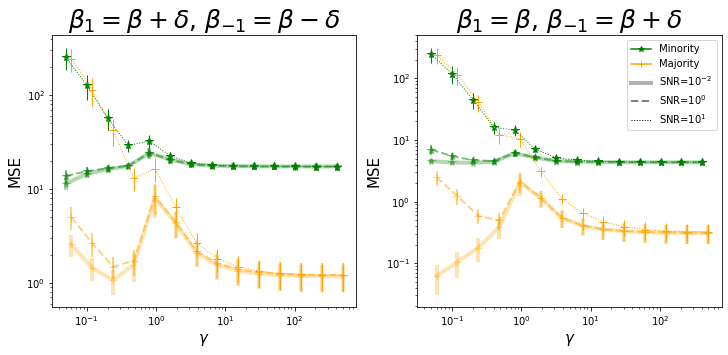

In [7]:
betas = [0.01, 1, 10]
ltys = ['-', '--', ':']
lws = [4, 2, 1]
alphas = [0.3, 0.5, 1]
add_on = 4 ** np.array(range(6))
#setups = ['same-core-over-envs', 'different-core-over-envs']
setups = ['same-core', 'diff-core']
names = ['$\\beta_{1} = \\beta + \\delta$, $\\beta_{-1} = \\beta - \\delta$',\
     '$\\beta_{1} = \\beta$, $\\beta_{-1} = \\beta + \\delta$']
fig, ax = plt.subplots(1, 2, figsize = (12, 5), sharex=True)
for s, (setup, name) in enumerate(zip(setups, names)):
    result_setup = result.loc[result['setup']==setup]
    for i, (beta, lty, lw, alpha) in enumerate(zip(betas, ltys, lws, alphas)):
        result1 = result_setup.loc[result['beta-norm']==beta]
        nodes, mean_minor, std_minor = result1['nodes'],\
            result1['minority-mse']['mean'], result1['minority-mse']['std']

        mean_major, std_major = result1['majority-mse']['mean'], result1['majority-mse']['std']
        mean_tr, std_tr = result1['train-mse']['mean'], result1['train-mse']['std']
    
        ax[s].errorbar(nodes/200, mean_minor, std_minor, color = 'g', linestyle = lty,\
             marker = '*', markersize = 8, lw = lw, alpha = alpha)
        ax[s].errorbar(nodes * (1.2)/200, mean_major, std_major, color = 'orange', linestyle = lty,\
         marker = '+', markersize = 8, lw = lw, alpha = alpha)
        #ax[s].errorbar(nodes * (1.4), mean_tr, std_tr, color = 'g', linestyle = lty, marker = 'x',\
         #markersize = 8, lw = lw, alpha = alpha)
        ax[s].set_yscale('log')
        ax[s].set_xscale('log')
        ax[s].set_xlabel('$\\gamma$', fontsize = 15)
        ax[s].set_ylabel('MSE', fontsize = 15)
        ax[s].set_title(name, fontsize = 25)
        #ax[s].set_ylim(0, 20)
        
    
lines = [Line2D([0], [0], color='g', linestyle='-', marker='*'), \
    Line2D([0], [0], color='orange', linestyle='-', marker='+')]#, \
        #Line2D([0], [0], color='g', linestyle='-', marker='x')\
        #]  
labels = ['Minority', 'Majority']#, 'Balanced Train']
for i, (beta, lty, lw, alpha) in enumerate(zip(betas, ltys, lws, alphas)):
    lines.append(Line2D([0], [0], color='k', linestyle=lty, lw = lw, alpha = alpha))
    j = i-1
    if j == -1:
        labels.append('SNR=$10^{-2}$')
    else:
        labels.append(f'SNR=$10^{j}$')
plt.legend(lines, labels, fontsize = 10)
plt.savefig('pdf_plots/plot.pdf')